In [1]:
import pandas as pd

matches = pd.read_csv("matches_2classes.csv", index_col=0)
#matches.head()

In [2]:
predictors = ["venue_code", "opp_code", "hour", "day_code"]

train = matches[matches["date"] < '2024-01-01']
test = matches[matches["date"] > '2024-01-01']

In [3]:
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                            )

In [4]:
dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=10,)

rf = RandomForestClassifier(n_estimators=100, 
                            min_samples_split=20, 
                            random_state=1)

svc = LinearSVC(multi_class = 'ovr',
                C = 1/120,
                dual = True)

lr = LogisticRegression(max_iter=1000,
                        random_state=1)

knn = KNeighborsClassifier(n_neighbors=5)

xgb = GradientBoostingClassifier(n_estimators=100, 
                                min_samples_split=20, 
                                random_state=1)

cb = CatBoostClassifier(verbose=0, 
                        n_estimators=100)



In [5]:
models = [dt, rf, svc, lr, knn, xgb, cb]
models_name = ['dt', 'rf', 'svc', 'lr', 'knn', 'xgb', 'cb']

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def evaluation_(models):
    accuracy = []
    precision = []
    recall = []
    f1score = []
    for model in models:
        model.fit(train[predictors], train['target'])
        preds = model.predict(test[predictors])
        accuracy.append(accuracy_score(test["target"], preds))
        precision.append(precision_score(test["target"], preds))
        recall.append(recall_score(test["target"], preds))
        f1score.append(f1_score(test["target"], preds))
    return accuracy, precision, recall, f1score
        
accuracy, precision, recall, f1score = evaluation_(models)

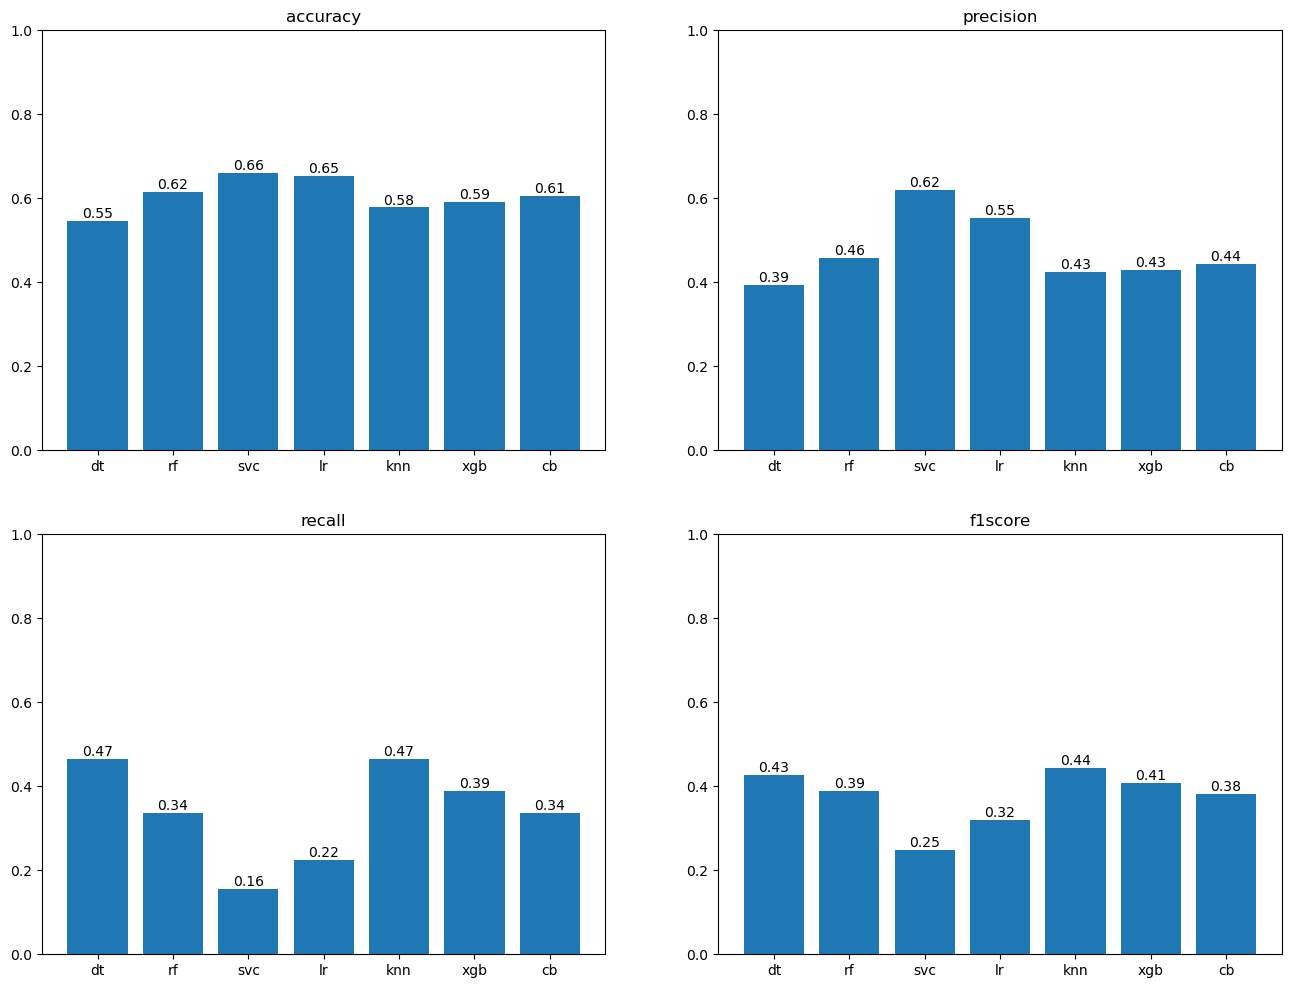

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

ax = ax.flatten()

score = [accuracy, precision, recall, f1score]
score_name = ['accuracy', 'precision', 'recall', 'f1score']

for i in range(len(ax)):
    ax[i].bar(models_name, score[i])
    ax[i].set_title(score_name[i])
    ax[i].set_ylim([0, 1])
    for j, v in enumerate(score[i]):
        ax[i].text(j, v, str(round(v, 2)), ha='center', va='bottom')


In [9]:
matches = pd.read_csv("matches_2classes_rolling.csv", index_col=0)

train = matches[matches["date"] < '2024-01-01']
test = matches[matches["date"] > '2024-01-01']

cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

predictors += new_cols

In [10]:
accuracy, precision, recall, f1score = evaluation_(models)

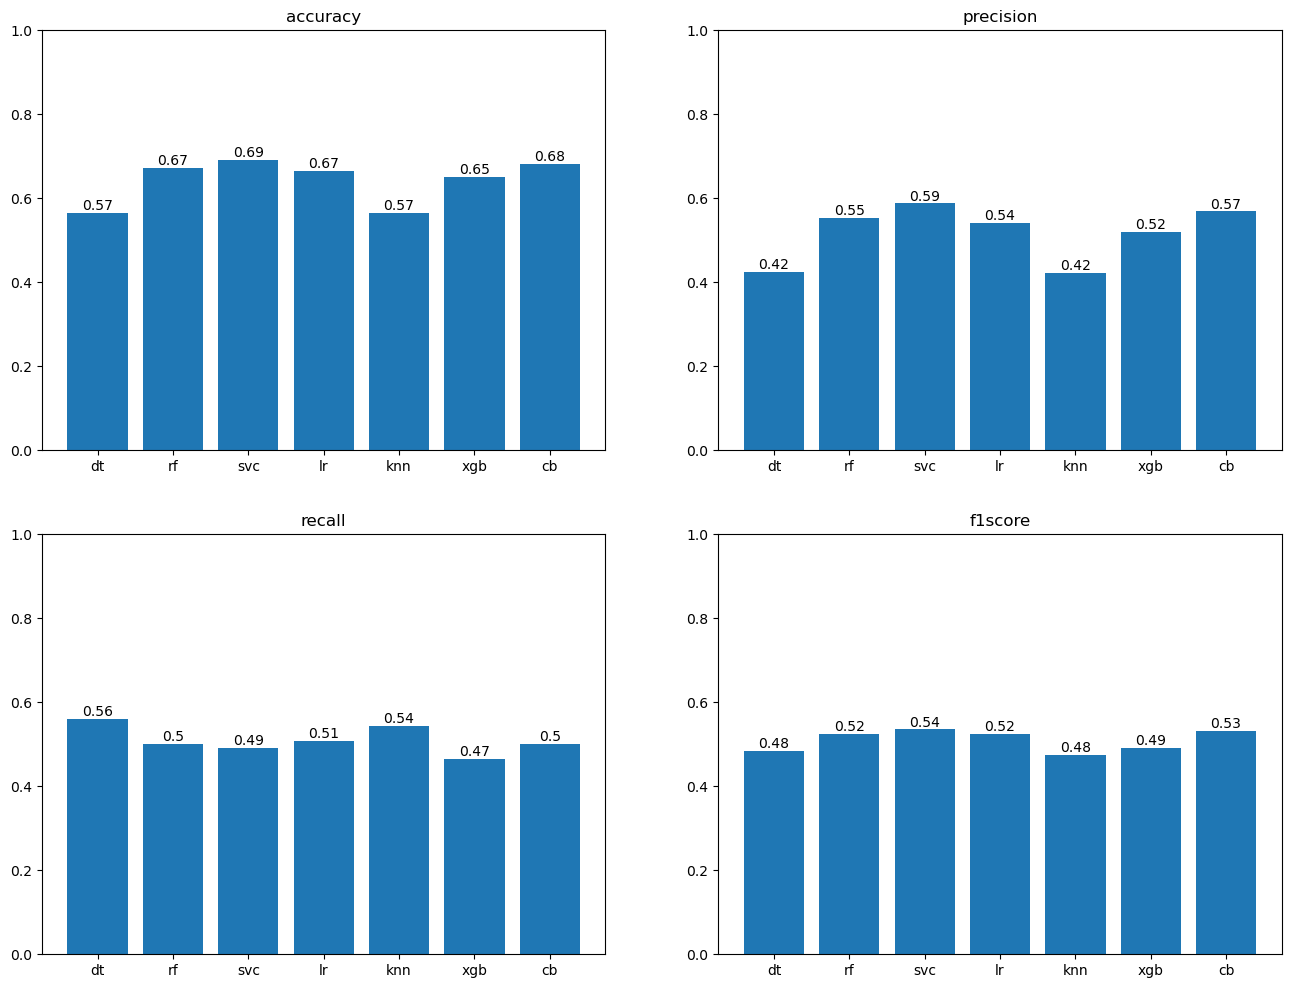

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

ax = ax.flatten()

score = [accuracy, precision, recall, f1score]
score_name = ['accuracy', 'precision', 'recall', 'f1score']

for i in range(len(ax)):
    ax[i].bar(models_name, score[i])
    ax[i].set_title(score_name[i])
    ax[i].set_ylim([0, 1])
    for j, v in enumerate(score[i]):
        ax[i].text(j, v, str(round(v, 2)), ha='center', va='bottom')